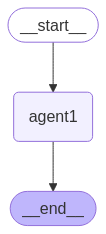

In [5]:
from typing import Annotated
from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

from dotenv import load_dotenv
from langchain_openai import ChatOpenAI

load_dotenv()

class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]

graph_builder = StateGraph(State)


llm = ChatOpenAI(model="gpt-4.1-mini")

# llm.with_structured_output()

def agent1(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

def agent2(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("agent1", agent1)
graph_builder.add_edge(START, "agent1")
graph_builder.add_edge("agent1", END)
graph = graph_builder.compile()

from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [6]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


In [7]:
user_input = "solve quadratic equation x^2-2x+5=0"
stream_graph_updates(user_input)

Assistant: Given the quadratic equation:

\[
x^2 - 2x + 5 = 0
\]

We can solve it using the quadratic formula:

\[
x = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}
\]

Here, \( a = 1 \), \( b = -2 \), and \( c = 5 \).

1. Calculate the discriminant:

\[
\Delta = b^2 - 4ac = (-2)^2 - 4 \times 1 \times 5 = 4 - 20 = -16
\]

Since the discriminant is negative, the solutions will be complex.

2. Find the roots:

\[
x = \frac{-(-2) \pm \sqrt{-16}}{2 \times 1} = \frac{2 \pm \sqrt{-16}}{2} = \frac{2 \pm 4i}{2} = 1 \pm 2i
\]

**Answer:**

\[
x = 1 + 2i \quad \text{or} \quad x = 1 - 2i
\]
